# Back to business. Better segmentation!

In [188]:
from util import *
sql('SELECT Producto, COUNT(*) AS N FROM cam group by Producto').T

,0,1,2
Producto,alcohol,camilla,mascarilla
N,9426,4638,43949


### 1. Alcohol First. 
Evaluemos los segmentos. 

In [12]:
alco = sql("SELECT * FROM cam WHERE Producto='alcohol'")
VIEW_COLS = ['ID_OC','Fecha','Descripcion','Precio']
alco.head()[VIEW_COLS]

,ID_OC,Fecha,Descripcion,Precio
0,41717364,2020-03-30,alcohol gel,"$29,950"
1,12100200,2009-07-09,alcohol gel 211 0290 000,"$30,367"
2,24805744,2014-03-18,alcohol gel solución gel 800cc,"$2,892"
3,41681649,2020-03-24,alcohol gel 60 ml cotizacion l17831,"$3,500"
4,38654719,2019-02-07,alcohol gel 70° fra 340 ml 100001716,"$1,709"


In [185]:
NU_VIEW = VIEW_COLS + ['segmento']; alco['segmento'] = alco.Descripcion.apply(vol_data)
view = alco; view[view.segmento=='N/A'].sample(5)[NU_VIEW]

,ID_OC,Fecha,Descripcion,Precio,segmento
3706,27199395,2014-12-23,alcohol gel,"$2,535",N/A
7197,17781714,2011-07-28,alcohol gel marca elite envase 1 lt se adjunta solicitud,"$4,140",N/A
5962,36143181,2018-03-22,alcohol gel 360 ml,"$1,941",N/A
5051,24066944,2013-10-23,alcohol gel fc 340 cc,"$1,420",N/A
5484,41628385,2020-03-16,alcohol gel x 1 lt con dosificador,"$3,764",N/A


In [184]:
sdf = stats(alco)
sdf.to_excel('seg_alcohol_v1.xlsx')
sdf

Precio                                     p05    p95      std tight
          count    min median    mean        max                             
segmento                                                                     
1000      3378  $1     $4,083 $10,698 $4,185,000 $1     $1,292 $78,452  $32  
N/A       2775  $1     $3,330 $10,399 $7,870,248 $394   $723   $155,777 $10  
340       1408  $161   $1,686 $3,186  $37,440    $164   $928   $5,300   $45  
800       426   $629   $3,479 $8,833  $79,977    $735   $1,865 $13,269  $32  
60        415   $324   $1,256 $12,926 $4,513,161 $336   $453   $221,298 $9   
50        411   $377   $1,628 $2,587  $57,626    $389   $509   $4,480   $7   
950       301   $3,200 $3,962 $7,395  $42,013    $3,200 $3,200 $7,092   $0   
500       254   $4     $2,650 $3,768  $128,592   $4     $1,035 $9,366   $39  
100       27    $650   $1,400 $2,216  $6,224     $650   $658   $1,867   $1   
800-1000  19    $1,958 $2,899 $3,079  $5,490     $1,962 $2,042 $704     $3   
5000      12    $1,499 $9,066 $9,909  $26,000    $1,511 $1,723 $6,624   $2

In [62]:
print('Sólo %.1f caen en N/A' %(100*2775/len(alco)))

Sólo 29.4 caen en N/A


In [187]:
nas = alco[alco.segmento=='N/A']
nas.Descripcion.value_counts().head(5)  # ojo cj = CAJA

alcohol gel            1178
alcohol gel 1 litro    132 
alcohol gel 340 ml     91  
alcohol gel litro      74  
alcohol gel 1 lt       66  
Name: Descripcion, dtype: int64

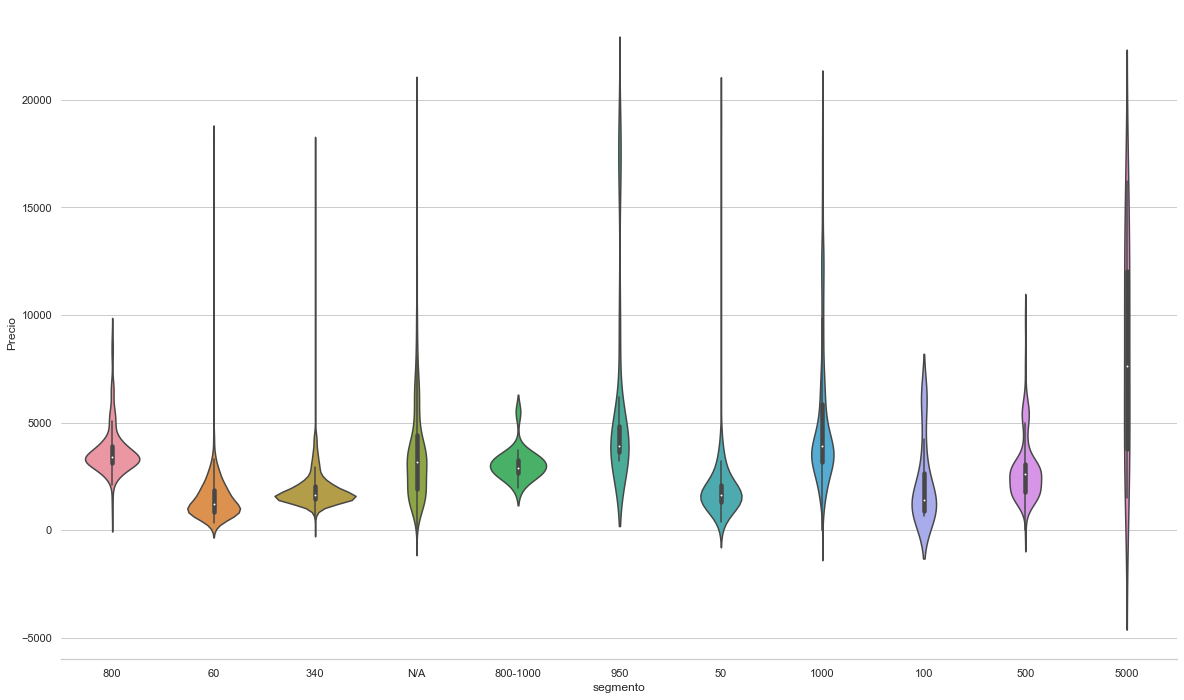

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(20,12))
real = alco[alco.Precio<20000]
sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x="segmento", y="Precio", #hue="smoker",
               #split=True, inner="quart",
               #palette={"Yes": "y", "No": "b"},
               data=real)
sns.despine(left=True)

In [85]:
### Viewing outliers
pd.DataFrame(alco.Precio.describe(percentiles=[.05,.95])).T

,count,mean,std,min,5%,50%,95%,max
Precio,"$9,426","$8,815","$107,398",$1,"$1,123","$3,298","$29,415","$7,870,248"


In [82]:
bajos = alco[alco.Precio<1000];bajos.sort_values('Precio').head(10)[VIEW_COLS+['Monto']]

,ID_OC,Fecha,Descripcion,Precio,Monto
9424,30529346,2016-04-08,alcohol gel 1 litro precio unit 5 500,$1,$0
9422,36938502,2018-07-12,alcohol gel 1 litro orden de compra que formaliza el convenio suministro,$1,$0
9421,36938499,2018-07-12,alcohol gel 1 litro orden de compra que formaliza el convenio suministro,$1,$0
9423,36938505,2018-07-11,alcohol gel 1 litro orden de compra que formaliza el convenio suministro los pedidos se realizaran cuando lo requiera el hospital,$1,$0
4970,24389459,2013-12-04,alcohol gel,$1,$318
147,30021114,2016-02-16,alcohol gel 70° fra 300 a 500 ml 100002634,$4,"$8,903"
417,41112975,2020-01-15,alcohol gel 70° fra 300 a 500 ml x ml 100002634,$5,"$4,437"
3473,21417415,2012-11-12,alcohol gel 70º frasco 340 ml,$161,$597
6877,20746694,2012-08-13,alcohol gel dimenciones 340cc con dispensador,$165,$143
7161,17549313,2011-06-24,alcohol gel 60 ml con dispensador,$324,$125


In [86]:
altos = alco[alco.Precio>30000];altos.sort_values('Precio',ascending=False).head(10)[VIEW_COLS+['Monto']]

,ID_OC,Fecha,Descripcion,Precio,Monto
164,41721430,2020-03-31,mascarillas y alcohol gel segun cotización adjunta,"$7,870,248","$7,870"
399,41624299,2020-03-16,alcohol gel 360 cc tremex 70 s enjuage und 411 dispensador toalla palanca anti bact jo und 61 toalla papel 2 roll 280 mt tecnoroll pqt 215 toalla desinfec clorox wipes fresh mul und 200,"$4,513,161","$4,513"
474,41690473,2020-03-25,alcohol gel 1 litro,"$4,185,000","$4,185"
999,41686913,2020-03-26,alcohol gel,"$2,131,765","$2,713"
523,41723275,2020-03-31,alcohol gel x 1 lt 200 unidades,"$1,342,857","$3,998"
3118,36380942,2018-04-23,alcohol gel y otros es de carácter obligatorio completar anexo adjunto en su totalidad,"$698,855",$699
3333,41695901,2020-03-26,mascarillas de cobre cooper mask x2 total 11 alcohol gel 5 lts mascarilla lavable total 80,"$631,900",$632
3685,32255788,2016-11-08,alcohol gel tamaño familiar es de carácter obligatorio ingresar el valor unitario de cada uno de los productos en el cuadro adjunto todos,"$541,505",$542
3930,33217073,2017-03-10,alcohol gel en botella de un litro \tpara ofertar es de caracter obligatorio ingresar el valor unitario de cada uno de los productos en el cuadro adjunto todos de no ser así su oferta será inadmi,"$481,342",$481
4867,41647546,2020-03-18,alcohol gel,"$335,000",$335


## Idea Final Alcohol
Dentro de cada segmento, debemos eliminar los outliers y definir (05,mean,median,std,95)

# 2. Mascarillas
Repetimos el mismo procedimiento.

In [100]:
mask = sql("SELECT * FROM cam WHERE Producto='mascarilla'")
mask.head()[VIEW_COLS]

,ID_OC,Fecha,Descripcion,Precio
0,41547071,2020-03-06,mascarilla desech hipoalerg c filtro 100000995,$500
1,41702082,2020-03-26,mascarilla n95 conforme requerimientos técnicos,"$3,127"
2,41675090,2020-03-24,mascarillas desechables 3ply n99,$724
3,41708420,2020-03-27,mascarillas 3 pliegues desechables,$612
4,41708420,2020-03-27,mascarillas kn95,"$3,800"


In [150]:
 
mask['segmento'] = mask.Descripcion.apply(type_data)
print(str({k: round(100*v,2) for k,v in mask.segmento.value_counts(normalize=True).to_dict().items()}))
malos = mask[mask.segmento=='N/A']
malos.Descripcion.value_counts().head(15)

{'desechable': 27.27, 'N/A': 21.04, 'venturi': 5.96, 'laringea': 4.99, 'con elastico': 4.87, 'nebulizador': 4.82, 'oxigeno': 4.7, 'alta concentracion': 4.11, 'alto flujo': 2.66, 'nebulizacion': 2.02, 'con reservorio': 1.98, 'n95': 1.95, 'multivent': 1.77, '3 pliegues': 1.45, 'con elástico': 1.32, 'con filtro': 1.29, 'nasal': 1.02, 'n 95': 0.87, 'para nebulizar': 0.84, 'con visor': 0.8, 'aeros': 0.72, 'infantil': 0.46, 'nº 95': 0.37, 'quirurgica': 0.35, 'tres pliegues': 0.32, 'nº95': 0.31, 'n°95': 0.3, '3m 8210': 0.21, 'hudson rci': 0.16, 'para pabellon': 0.15, '452036': 0.13, 'para sustancias toxicas': 0.12, 'kn95': 0.12, 'genesis 9332': 0.1, 'caja de 10 unidades': 0.1, 'hipoalergenica': 0.1, 'reservorio adulto': 0.09, 'traqueotomía': 0.07, 'con selec': 0.06, 'alta eficiencia': 0.04, 'n99': 0.01}


mascarillas                                                          882
mascarilla                                                           516
mascarillas para polvo                                               29 
mascarillas de oxígeno médicas o piezas                              18 
mascarillas planas                                                   18 
mascarilla antipolvo                                                 17 
mascarilla n° 95                                                     17 
mascarillas con tiras                                                16 
mascarilla de resucitacion neonatal nº0                              16 
mascarillas de aislamiento o quirófano para el personal sanitario    15 
mascarilla p nebulizar adulto                                        15 
mascarillas de papel                                                 15 
mascarillas antipolvo                                                14 
mascarillas de proteccion                          

In [162]:
msdf = stats(mask)
msdf.to_excel('seg_mascarillas_v1.xlsx')    
msdf

Precio                                          p05  \
                         count     min  median     mean         max           
segmento                                                                      
desechable               11985 $1      $749    $5,020   $33,991,358 $nan      
N/A                      9243  $0      $2,349  $19,394  $19,998,000 $nan      
venturi                  2619  $1      $682    $2,616   $4,173,532  $1        
laringea                 2193  $514    $8,206  $38,507  $448,951    $1,167    
con elastico             2141  $9      $1,120  $2,294   $1,203,651  $9        
nebulizador              2118  $94     $625    $6,987   $12,472,668 $195      
oxigeno                  2062  $50     $649    $1,813   $1,337,262  $nan      
alta concentracion       1806  $255    $708    $1,682   $61,629     $299      
alto flujo               1167  $1      $747    $910     $32,914     $148      
nebulizacion             887   $63     $686    $1,395   $43,472     $124      
con reservorio           871   $323    $682    $1,660   $238,823    $354      
n95                      857   $17     $2,640  $10,032  $148,914    $26       
multivent                780   $412    $802    $924     $2,765      $417      
3 pliegues               636   $11     $1,202  $9,232   $1,034,850  $11       
con elástico             578   $1      $1,046  $1,590   $22,000     $4        
con filtro               566   $11     $5,262  $19,022  $3,000,000  $11       
nasal                    447   $21     $63,554 $70,490  $221,661    $21       
n 95                     382   $43     $1,116  $8,662   $193,390    $48       
para nebulizar           370   $11     $636    $762     $5,960      $31       
con visor                352   $270    $1,176  $10,063  $107,712    $280      
aeros                    317   $117    $675    $1,617   $185,725    $137      
infantil                 200   $201    $1,219  $12,841  $402,157    $209      
nº 95                    162   $142    $3,220  $10,927  $93,758     $147      
quirurgica               155   $13     $1,326  $3,027   $107,891    $nan      
tres pliegues            140   $0      $1,264  $4,307   $75,000     $1        
nº95                     135   $199    $871    $35,061  $3,948,992  $200      
n°95                     132   $200    $3,650  $10,740  $86,660     $202      
3m 8210                  91    $265    $12,972 $9,120   $24,823     $274      
hudson rci               70    $633    $2,205  $5,580   $31,218     $635      
para pabellon            64    $106    $118    $134     $1,191      $106      
452036                   58    $24,518 $26,104 $34,285  $52,134     $24,520   
para sustancias toxicas  54    $799    $2,428  $2,402   $2,605      $838      
kn95                     51    $1,850  $2,590  $6,632   $68,900     $1,850    
genesis 9332             46    $1,323  $3,243  $5,077   $32,141     $1,348    
caja de 10 unidades      45    $1,031  $2,649  $4,805   $55,063     $1,065    
hipoalergenica           43    $12     $136    $2,564   $29,412     $12       
reservorio adulto        40    $182    $554    $813     $3,778      $185      
traqueotomía             29    $2,110  $2,241  $2,233   $2,400      $2,111    
con selec                28    $630    $1,370  $1,137   $1,497      $630      
alta eficiencia          18    $549    $34,290 $156,604 $362,640    $552      
n99                      5     $724    $724    $21,650  $100,000    $724      

                            p95      std tight  
                                                
segmento                                        
desechable              $nan    $310,662 $nan   
N/A                     $nan    $217,420 $10    
venturi                 $439    $81,570  $nan   
laringea                $4,185  $58,362  $nan   
con elastico            $13     $26,188  $nan   
nebulizador             $320    $270,944 $nan   
oxigeno                 $nan    $29,980  $nan   
alta concentracion      $445    $6,240   $nan   
alto flu

Mucho ruido, pocas nueces.

## 3. Camillas. Is the meat here???
Son las más caras y las que concentran el monto mayor. Además hay código FONASA. Fingers crossed!

In [167]:
cami = sql("SELECT * FROM cam WHERE Producto='camilla'")
print(len(cami))
cami.head()[VIEW_COLS]

4638


,ID_OC,Fecha,Descripcion,Precio
0,19146142,2011-12-30,camilla rígida con inmovilizador,"$164,284"
1,21788709,2013-02-27,camilla de transporte paciente ver eett,"$1,942,263"
2,24081415,2013-10-25,camilla transporte de pacientes para reanimación,"$2,417,962"
3,24081415,2013-10-25,camilla transporte pacientes,"$1,585,449"
4,17027263,2011-04-25,camilla recuperación y procedimientos segun eett adjuntas,"$1,955,350"


In [181]:
cami['segmento'] = cami.Descripcion.apply(cami_type)
print(str(cami.segmento.value_counts(normalize=True).head(10).to_dict()))
bcam = cami[cami.segmento=='N/A'];bcam.Descripcion.value_counts().head(10)

{'N/A': 0.4320827943078913, 'examen': 0.09098749460974558, 'de examen': 0.08904700301854247, 'plegable': 0.07503234152652005, 'ginecologica': 0.07373868046571798, 'de transporte': 0.05735230702889176, 'clinica': 0.04376886589047003, 'transporte': 0.037516170763260026, 'portatil': 0.03622250970245795, 'traslado': 0.032988357050452784}


camilla                                         66
camillas                                        22
camillas para mecanicos                         9 
camilla hidráulica                              7 
camilla reanimación                             7 
camilla primeros auxilios                       6 
camilla con ruedas                              6 
camillas de paciente o accesorios de camilla    5 
camilla reanimación  según eett adjuntas        5 
camilla de reanimacion                          5 
Name: Descripcion, dtype: int64

In [183]:
csdf = stats(cami).sort_values(('Precio','median'))
csdf.to_excel('seg_camillas_v1.xlsx')    
csdf

Precio                                             \
                     count      min     median       mean         max   
segmento                                                                
electrica            23    $21,584  $22,616    $1,297,412 $6,249,968    
espinal              52    $23,630  $53,500    $69,206    $278,181      
de examen            413   $33,199  $93,638    $149,467   $5,263,641    
examen               422   $52,029  $96,663    $214,049   $5,653,841    
clinica              203   $52,836  $107,898   $250,193   $2,996,105    
estructura metalica  62    $63,803  $108,620   $156,443   $946,066      
auxilio acero        8     $116,908 $116,908   $116,908   $116,908      
plegable             348   $36,332  $130,950   $248,268   $4,686,501    
portatil             168   $35,350  $134,848   $198,706   $1,808,352    
ginecologica         342   $15,369  $219,242   $803,771   $60,596,756   
N/A                  2004  $1       $241,147   $773,146   $28,475,015   
traslado             153   $46,431  $1,156,562 $1,148,534 $3,842,295    
transporte           174   $53,394  $1,642,842 $2,159,093 $98,971,440   
de transporte        266   $60,508  $1,706,085 $1,649,422 $13,073,619   

                         p05      p95        std tight  
                                                        
segmento                                                
electrica           $21,585  $21,600  $1,718,227 $nan   
espinal             $23,672  $24,421  $46,449    $nan   
de examen           $37,562  $60,187  $305,266   $nan   
examen              $52,229  $54,201  $456,528   $nan   
clinica             $52,888  $58,974  $450,894   $nan   
estructura metalica $63,838  $64,468  $136,660   $nan   
auxilio acero       $116,908 $116,908 $0         $nan   
plegable            $37,604  $48,597  $423,093   $nan   
portatil            $36,735  $52,206  $234,122   $nan   
ginecologica        $23,186  $124,384 $3,891,725 $nan   
N/A                 $17      $27,292  $1,433,787 $10    
traslado            $46,619  $52,216  $890,709   $nan   
transporte          $54,891  $75,493  $7,594,282 $nan   
de transporte       $61,986  $77,668  $1,276,321 $nan

Ahora sólo queda agregar columnas 2019, 2020